In [1]:
import numpy as np 
import matplotlib.pyplot as plt

Titulação 

In [11]:
n = [0.1,100,1]
Volume = [0,1,5,9,9.9,10,10.01,12]

In [12]:
def Calculo_Titulacao(n,Volume,Ka = None):
    
    C_inicial = n[0]
    V_inicial = n[1]
    C_titulante = n[2]
    pKa = -np.log10(Ka)
    Kw = 10**-14
    def segundo_grau(a = 1,Ka = Ka):
        b = Ka
        c = -n[0]*Ka
        delta =  b**2 -4*a*c
        x = (-b - np.sqrt(delta))/2*a
        t = (-b + np.sqrt(delta))/2*a
        if x >0:
            return x
        else:
            return t
    polinomio = segundo_grau(a = 1,Ka = Ka)     
    #Achando Ve 
    Ve = (C_inicial*V_inicial)/C_titulante
    #Empty list to return values
    p_H = []
    
    for index , item in enumerate(Volume):
        if item == 0:
            C_H = polinomio
            pH = - np.log10(C_H)
            p_H.append(pH)
           
        elif item < Ve  :
            C_H = (C_inicial*V_inicial - C_titulante*Volume[index])/(V_inicial + Volume[index])
            C_A_menos = C_titulante*Volume[index]/(V_inicial+Volume[index])
            #Henderson Hasselbalch equation
            pH = pKa + np.log10(C_A_menos/C_H)
            p_H.append(pH)
            
        elif item == Ve:
            Kb = Kw/Ka
            C_A_menos = C_titulante*Ve/(V_inicial + Ve)
            C_OH = np.sqrt(Kb*C_A_menos)
            pH = 14 + np.log10(C_OH)
            p_H.append(pH)
        else:
            C_OH = (C_titulante*Volume[index] - C_inicial*V_inicial)/(V_inicial + Volume[index])
            pH = 14 + np.log10(C_OH)
            p_H.append(pH)
            
    display(f"Ve = {Ve}")        
    return p_H

In [13]:
Calculo_Titulacao(n,Volume,Ka = 10**-5)

'Ve = 10.0'

[3.002171463361816,
 4.045757490560675,
 5.0,
 5.954242509439325,
 6.9956351945975515,
 8.979303657420887,
 9.958567835319727,
 12.2518119729938]

In [14]:
y=Calculo_Titulacao(n,Volume,Ka = 10**-5)

'Ve = 10.0'

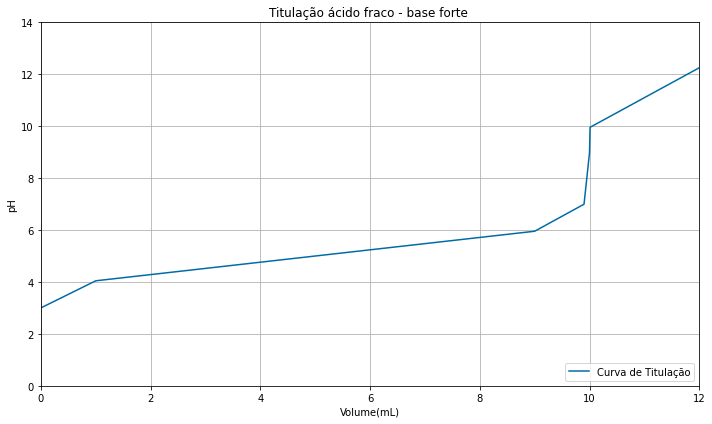

In [15]:
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(Volume,y,label = 'Curva de Titulação')
ax.legend(loc = 'lower right')
plt.xlabel('Volume(mL)')
plt.ylabel('pH')
plt.title('Titulação ácido fraco - base forte ')
plt.grid()
plt.ylim(0,14)
plt.xlim(0,12)
fig.tight_layout()